## In this notebook we will explore experimental design of competition assays.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
from matplotlib.colors import LogNorm

%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
#Three component competitive binding function
#This function and its assumptions are defined in greater detail in this notebook: 
## 1a-modelling-CompetitiveBinding-ThreeComponentBinding.ipynb

def three_component_competitive_binding(Ptot, Ltot, Kd_L, Atot, Kd_A):
    """
    Parameters
    ----------
    Ptot : float
        Total protein concentration
    Ltot : float
        Total tracer(fluorescent) ligand concentration
    Kd_L : float
        Dissociation constant of the fluorescent ligand
    Atot : float
        Total competitive ligand concentration
    Kd_A : float
        Dissociation constant of the competitive ligand
        
    Returns
    -------
    P : float
        Free protein concentration
    L : float
        Free ligand concentration
    A : float
        Free ligand concentration
    PL : float
        Complex concentration
    Kd_L_app : float
        Apparent dissociation constant of L in the presence of A
        
    Usage
    -----
    [P, L, A, PL, Kd_L_app] = three_component_competitive_binding(Ptot, Ltot, Kd_L, Atot, Kd_A)
    """
    Kd_L_app = Kd_L*(1+Atot/Kd_A)                                
    PL = 0.5 * ((Ptot + Ltot + Kd_L_app) - np.sqrt((Ptot + Ltot + Kd_L_app)**2 - 4*Ptot*Ltot))  # complex concentration (uM)
    P = Ptot - PL; # free protein concentration in sample cell after n injections (uM)                                                                                                                                                                                                                          
    L = Ltot - PL; # free tracer ligand concentration in sample cell after n injections (uM)
    A = Atot - PL; # free competitive ligand concentration in sample cell after n injections (uM)
    return [P, L, A, PL, Kd_L_app]

We can use this function to help us decide the appropriate concentrations to use to determine the Kd_A of a competitive ligand. For example, if we see no shift in the Kd_L_app upon adding the competitive ligand, we will not be able to calculate the Kd_A.

In [3]:
# Let's take the example of these three ligands affinity for Src Kinase
Kd_Bos = 1.0e-9 # M  # Fluorescent
Kd_Gef = 3800e-9 # M # Fluorescent
Kd_Ima = 3000e-9 # M # Non-Fluorescent (Competitive)

In [4]:
Ptot = 0.5e-6 # M
Ltot = 20.0e-6 / np.array([10**(float(i)/2.0) for i in range(12)]) # M

In [5]:
# Create grid of fluorescence as a function of imatinib concentration

#we want to make a grid of 8 Imatinib concentrations
#what if we just go be factors of ten from 10e-5 to 10e-12 M
concentration_range = [10e-5,10e-6,10e-7,10e-8,10e-9,10e-10,10e-11,10e-12] # M

competition_grid_bosutinib = []

for i,conc in enumerate(concentration_range):
    [P_bos_ima, L_bos_ima, A_bos_ima, PL_bos_ima, Kd_bos_ima] = three_component_competitive_binding(Ptot, Ltot, Kd_Bos, conc, Kd_Ima)
    if i == 0: 
          competition_grid_bosutinib = PL_bos_ima
    else:
          competition_grid_bosutinib = np.vstack((competition_grid_bosutinib,PL_bos_ima))

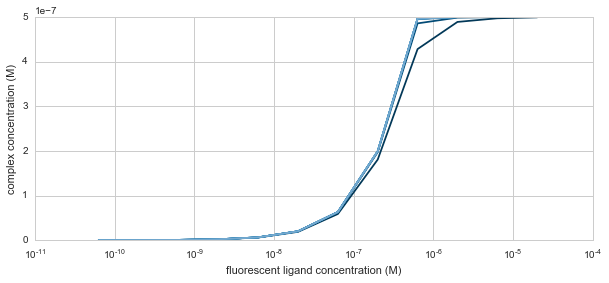

In [6]:
from matplotlib.pyplot import cm 
color=cm.PuBu_r(np.linspace(0,0.5,len(competition_grid_bosutinib)))

plt.figure(figsize=(10,4))
for i,PL in enumerate(competition_grid_bosutinib):
    plt.semilogx(Ltot,PL,color = color[i])
plt.xlabel('fluorescent ligand concentration (M)')
plt.ylabel('complex concentration (M)');

#### Here we can see that even though we've used a large range of competitor concentration (from 100 uM to 1 pM), we only see a shift of the apparent Kd at the highest concentration for this Bosutinib-Imatinib experiment!

In [7]:
for i,conc in enumerate(concentration_range):
    [P_gef_ima, L_gef_ima, A_gef_ima, PL_gef_ima, Kd_gef_ima] = three_component_competitive_binding(Ptot, Ltot, Kd_Gef, conc, Kd_Ima)
    if i == 0: 
          competition_grid_gefitinib = PL_gef_ima
    else:
          competition_grid_gefitinib= np.vstack((competition_grid_gefitinib,PL_gef_ima))

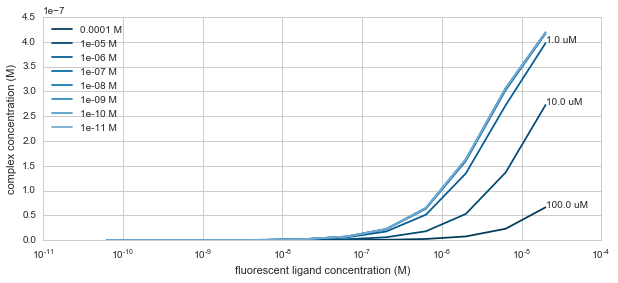

In [8]:
from matplotlib.pyplot import cm 
color=cm.PuBu_r(np.linspace(0,0.5,len(competition_grid_gefitinib)))

plt.figure(figsize=(10,4))
for i,PL in enumerate(competition_grid_gefitinib):
    plt.semilogx(Ltot,PL,color = color[i],label='%s M'%concentration_range[i])
plt.text(Ltot[0],competition_grid_gefitinib[0][0],'%s uM'%(concentration_range[0]*1e6))
plt.text(Ltot[0],competition_grid_gefitinib[1][0],'%s uM'%(concentration_range[1]*1e6))
plt.text(Ltot[0],competition_grid_gefitinib[2][0],'%s uM'%(concentration_range[2]*1e6))
plt.xlabel('fluorescent ligand concentration (M)')
plt.ylabel('complex concentration (M)');
plt.legend(loc=0);

#### Here we can see that for the Gefitinib-Imatinib experiment we can get a shift of the K_L_app with much lower concentration of the competitive ligand!

In [9]:
# Let's take look at how this would look like for Gefitinib and Imatinib with Abl
Kd_Gef = 2200e-9 # M # Fluorescent
Kd_Ima = 1.1e-9 # M # Non-Fluorescent (Competitive)

In [10]:
for i,conc in enumerate(concentration_range):
    [P_gef_ima, L_gef_ima, A_gef_ima, PL_gef_ima, Kd_gef_ima] = three_component_competitive_binding(Ptot, Ltot, Kd_Gef, conc, Kd_Ima)
    if i == 0: 
          competition_grid_gefitinib = PL_gef_ima
    else:
          competition_grid_gefitinib= np.vstack((competition_grid_gefitinib,PL_gef_ima))

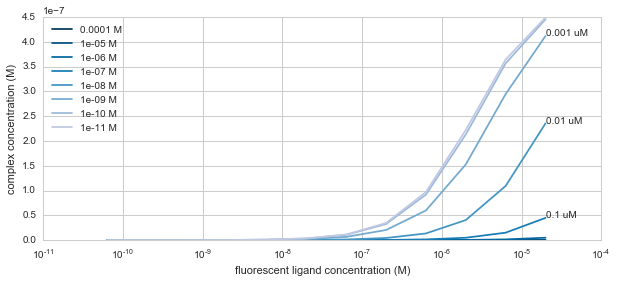

In [11]:
from matplotlib.pyplot import cm 
color=cm.PuBu_r(np.linspace(0,0.7,len(competition_grid_gefitinib)))

plt.figure(figsize=(10,4))
for i,PL in enumerate(competition_grid_gefitinib):
    plt.semilogx(Ltot,PL,color = color[i],label='%s M'%concentration_range[i])
plt.text(Ltot[0],competition_grid_gefitinib[3][0],'%s uM'%(concentration_range[3]*1e6))
plt.text(Ltot[0],competition_grid_gefitinib[4][0],'%s uM'%(concentration_range[4]*1e6))
plt.text(Ltot[0],competition_grid_gefitinib[5][0],'%s uM'%(concentration_range[5]*1e6))
plt.xlabel('fluorescent ligand concentration (M)')
plt.ylabel('complex concentration (M)');
plt.legend(loc=0);

Even Better!

### What does this look like if we make a plate out of it?

In [12]:
#Changing sig figs for Ltot
Ltot_visual = ['%.2g' % a for a in Ltot]
Ltot_visual

['2e-05',
 '6.3e-06',
 '2e-06',
 '6.3e-07',
 '2e-07',
 '6.3e-08',
 '2e-08',
 '6.3e-09',
 '2e-09',
 '6.3e-10',
 '2e-10',
 '6.3e-11']

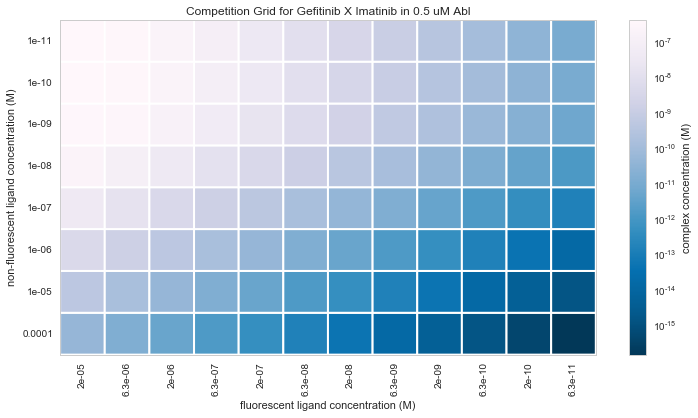

In [13]:
plt.figure(figsize=(12, 6))
plt.pcolor(competition_grid_gefitinib, 
           norm=LogNorm(vmin=competition_grid_gefitinib.min(), 
                        vmax=competition_grid_gefitinib.max()), 
           edgecolors='w',
           linewidths=2,
           cmap='PuBu_r')
plt.ticklabel_format(style='plain')
plt.xlabel('fluorescent ligand concentration (M)')
plt.ylabel('non-fluorescent ligand concentration (M)')
plt.xticks(np.arange(0.5, 12.5),Ltot_visual,rotation='vertical');
plt.yticks(np.arange(0.5, 12.5),concentration_range);
plt.ylim((0, len(concentration_range)))
plt.title('Competition Grid for Gefitinib X Imatinib in 0.5 uM Abl')
plt.colorbar(label='complex concentration (M)');